# Title

**Regularization and Decision Boundaries in Logistic Regression**

# Description

The goal of the exercise is to perform classification predictions on a logistic regression model .

# Instructions: 
- We are trying to predict who will have AHD based on Age and MaxHAR. To do so we need to:
- Read the `Heart.csv` as a data frame and split into train and test.
- Assign the predictor and response variables.
- Fit logistic regression models and interpret results
- Compute the accuracy of the model.
- Plot the classification boundaries against the two predictors
- Fit an untuned regularized logistic regression model and compare the classification boundary

# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a> : Accuracy classification score.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.accuracy_score()</a> : Accuracy classification score

<a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.pcolormesh.html" target="_blank">matplotlib.pcolormesh()</a> : Accuracy classification score

**Note: This exercise is auto-graded and you can try multiple attempts.**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)
#heart.head()
heart.describe()

(303, 15)


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [3]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)

**Q1.1** Below we fit an unregularized logistic regression model (`logit1`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates, and interpret general trends.

In [ ]:
degree = 1
predictors = ['Age','MaxHR']

X_train1 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])
y_train = heart_train['AHD']


logit1 = LogisticRegression( max_iter = 5000).fit(X_train1, y_train)

print("Logistic Regression Estimated Betas:", logit1.coef_, logit1.intercept_)

Logistic Regression Estimated Betas: [[ 0.02584719 -0.03884729]] [4.32595765]


*your interpretation here*

**Q1.1** Fit an unregularized 4th order polynomial (with interactions) logistic regression model (`logit4`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  Print out the coefficient estimates.

In [9]:
### edTest(test_logit4) ###

degree = 4
predictors = ['Age','MaxHR']

X_train4 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])

logit4 = LogisticRegression(max_iter = 5000).fit(X_train4, y_train)

print("Logistic Regression Estimated Betas:", logit4.coef_, logit4.intercept_)

Logistic Regression Estimated Betas: [[ 1.08380655e-05  3.55164174e-05  1.73339287e-04  5.53484244e-04
   1.84638986e-03  3.81831699e-04 -3.83715141e-04  1.08210956e-04
  -3.28833168e-05 -3.77570404e-06  2.04539589e-06  4.74366064e-07
  -3.15828292e-07  1.00671970e-07]] [4.61817137e-07]


**Q1.2** Evaluate the models based on misclassification rate in both the test set. 

In [20]:
### edTest(test_misclass) ###

predictors = ['Age','MaxHR']
X_test1 = PolynomialFeatures(degree=1,include_bias=False).fit_transform(heart_test[predictors])
X_test4 = PolynomialFeatures(degree=4,include_bias=False).fit_transform(heart_test[predictors])
y_test = heart_test['AHD']

# use logit.score()
misclass_logit1 = LogisticRegression(max_iter = 5000).fit(X_test1, y_test)
misclass_logit4 = LogisticRegression(max_iter = 5000).fit(X_test4, y_test)

print("Overall misclassification rate in test for logit1:", misclass_logit1.score(X_test1,y_test))
print("Overall misclassification rate in test for logit4:", misclass_logit4.score(X_test4,y_test))

Overall misclassification rate in test for logit1: 0.7252747252747253
Overall misclassification rate in test for logit4: 0.7472527472527473


The code below performs the classification predictions for the model at all values in the range of the two predictors for `logit1`.  Then the predictions and the train dataset are added to a scatterplot in the second code chunk:

In [23]:
n = 100

x1=np.linspace(np.min(heart[['Age']]),np.max(heart[['Age']]),n)
x2=np.linspace(np.min(heart[['MaxHR']]),np.max(heart[['MaxHR']]),n)
x1v, x2v = np.meshgrid(x1, x2)

# This is how we would typically do the prediction (have a vector of yhats)
#yhat10 = knn10.predict(np.array([x1v.flatten(),x2v.flatten()]).reshape(-1,2))

# To do the predictions and keep the yhats on 2-D (to match the dummy predictor shapes), use this
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = PolynomialFeatures(degree=1,include_bias=False).fit_transform(X)

yhat1 = logit1.predict(X_dummy)

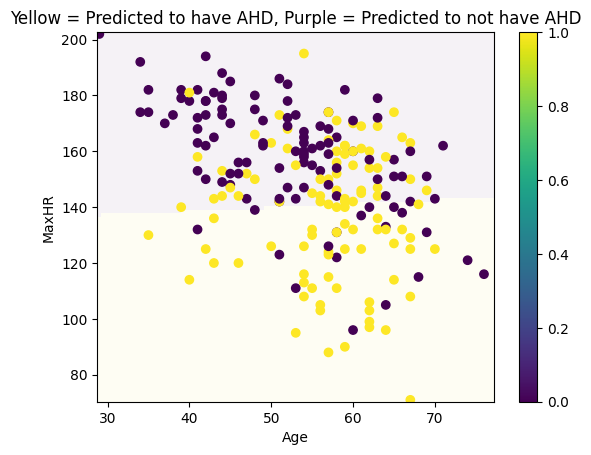

In [ ]:
plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

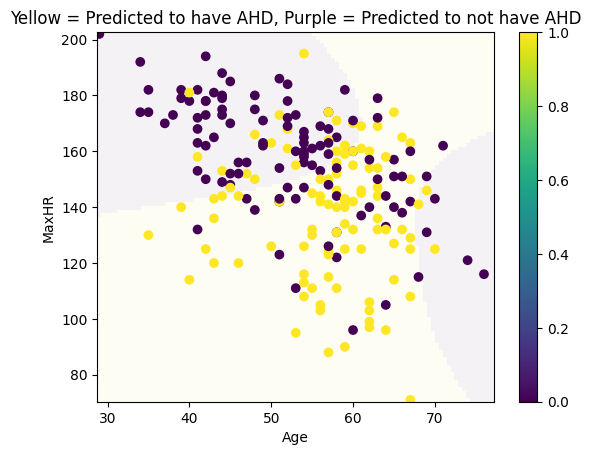

In [25]:
#Perform the same calculation above, but for the 4th order polynomial
X_dummy = PolynomialFeatures(degree=4,include_bias=False).fit_transform(X)
yhat4 = logit4.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat4.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

**Q1.3** Compare the two models above on how they create the classification boundary.  Which is more likely to be overfit?  How would regularization affect these boundaries?

*your answer here*

**Q1.4** Fit a ridge-like Logistic Regression model with `C=0.0001` on the 4th order polynomial as before.  Compare this regularized model with the unregularized one by using the classification boundary.

In [29]:
### edTest(test_ridge) ###
# insert penalty='l2' into your LogisticRegression() 
logit_ridge = LogisticRegression(penalty='l2', C=0.0001, max_iter = 5000).fit(X_train4, y_train)

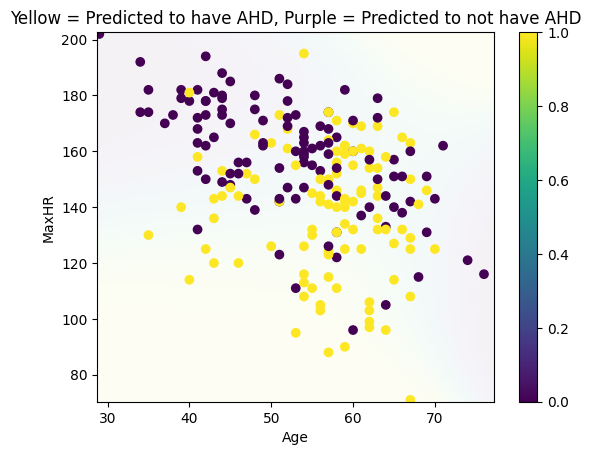

In [ ]:
yhat_ridge = logit_ridge.predict_proba(X_dummy)[:,1]

plt.pcolormesh(x1v, x2v, yhat_ridge.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()